# Classification of image objects through CNN

In [35]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\dania\AppData\Local\Temp\pip-install-64mwwo0b\tensorflow-gpu_1a516c21ec4848a79e87c8284da1d495\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. display dataset images

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

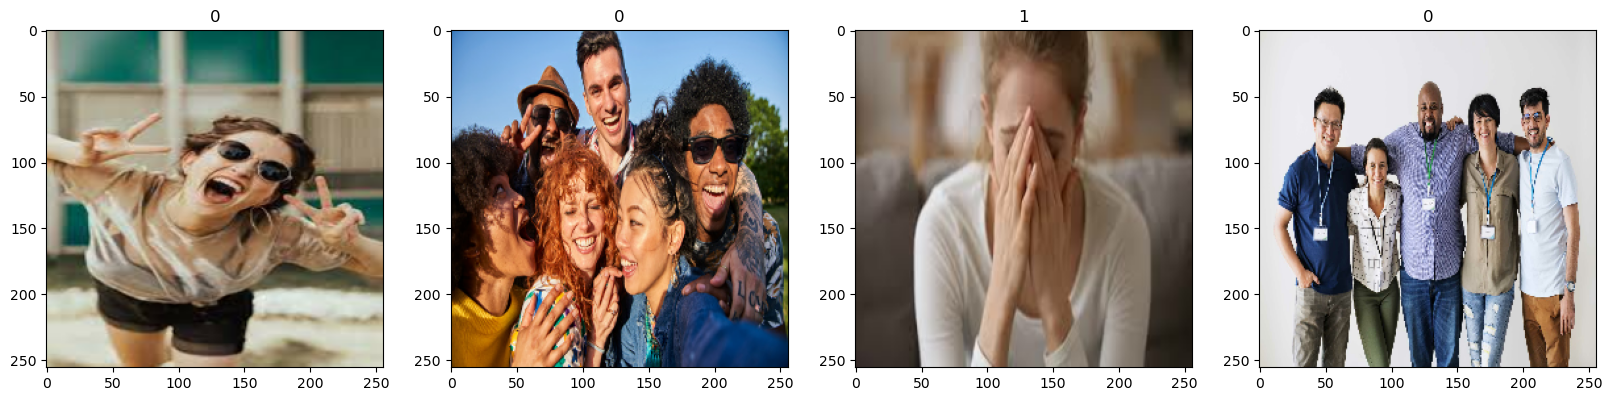

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.44705883, 0.46666667, 0.49019608],
          [0.44733456, 0.4669424 , 0.49019608],
          [0.45536152, 0.47496936, 0.49065563],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         [[0.44708782, 0.46669567, 0.49022508],
          [0.44972154, 0.4693294 , 0.49258307],
          [0.45536152, 0.47496936, 0.49065563],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         [[0.44861367, 0.46822152, 0.49175093],
          [0.45262715, 0.472235  , 0.49548867],
          [0.4568704 , 0.47647825, 0.49216452],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 4. Split Data

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

7

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Build Deep Learning Model

In [15]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

# Apply CNN 

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 6. Train

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 0.9041 - accuracy: 0.5223 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 12s 1s/step - loss: 0.6793 - accuracy: 0.5580 - val_loss: 0.6610 - val_accuracy: 0.4844
Epoch 3/20
7/7 [==============================] - 11s 1s/step - loss: 0.6501 - accuracy: 0.5893 - val_loss: 0.6260 - val_accuracy: 0.4688
Epoch 4/20
7/7 [==============================] - 11s 1s/step - loss: 0.5543 - accuracy: 0.7991 - val_loss: 0.4305 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.3866 - accuracy: 0.8304 - val_loss: 0.5465 - val_accuracy: 0.7188
Epoch 6/20
7/7 [==============================] - 12s 1s/step - loss: 0.4078 - accuracy: 0.8214 - val_loss: 0.3726 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 12s 1s/step - loss: 0.3596 - accuracy: 0.8973 - val_loss: 0.2983 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

# 7. Evaluate

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 297ms/step


In [27]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 8. Test WITH NEW DATA

In [28]:
import cv2

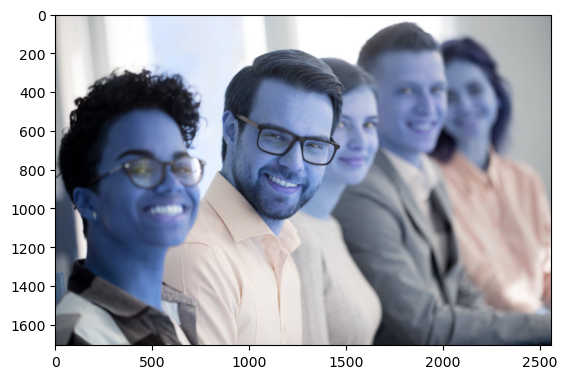

In [29]:
img = cv2.imread('happy2.jpg')
plt.imshow(img)
plt.show()

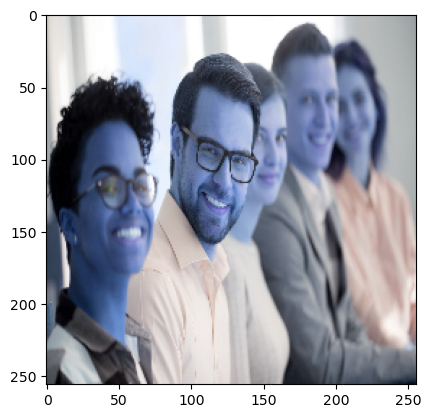

In [30]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [32]:
yhat

array([[0.03867918]], dtype=float32)

In [33]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
